# SF-DAT-21 | Unit Project 3 | Miranda Remmer

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Projects 1 and 2.

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline


plt.style.use('ggplot')

In [178]:
df_raw = pd.read_csv("../../dataset/admissions.csv")
df = df_raw.dropna()
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [179]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

## Part 1. Frequency Tables

#### Question 1. Let's create a frequency table of our variables.

In [180]:
df.prestige.unique()

array([ 3.,  1.,  4.,  2.])

In [181]:
df.prestige.count()

397

In [182]:
df.admit.count()

397

In [183]:
print np.nan, df.prestige.isnull().sum()
for prestige_score_count in np.sort(df.prestige.dropna().unique()):
    print prestige_score_count, len(df[df.prestige == prestige_score_count])

nan 0
1.0 61
2.0 148
3.0 121
4.0 67


In [184]:
pd.crosstab(df['admit'], df['prestige'], rownames = ['admit'])

#frequency table for prestige and whether or not someone was admitted

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


## Part 2. Return of dummy variables

#### Question 2.1. Create class or dummy variables for prestige.

In [185]:
dummy_ranks = pd.get_dummies(df.prestige, prefix = 'prestige')

In [186]:
dummy_ranks.rename(columns={'prestige_1.0': 'prestige_1',
                        'prestige_2.0': 'prestige_2',
                        'prestige_3.0': 'prestige_3',
                        'prestige_4.0': 'prestige_4'}, inplace = True)
dummy_ranks

,prestige_1,prestige_2,prestige_3,prestige_4
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
395,0.0,1.0,0.0,0.0
396,0.0,0.0,1.0,0.0
397,0.0,1.0,0.0,0.0
398,0.0,1.0,0.0,0.0


In [187]:
df = df.join([dummy_ranks])

In [188]:
df.columns

Index([u'admit', u'gre', u'gpa', u'prestige', u'prestige_1', u'prestige_2',
       u'prestige_3', u'prestige_4'],
      dtype='object')

In [189]:
df.drop('prestige', axis = 1, inplace = True)

In [190]:
df.columns

Index([u'admit', u'gre', u'gpa', u'prestige_1', u'prestige_2', u'prestige_3',
       u'prestige_4'],
      dtype='object')

#### Question 2.2. When modeling our class variables, how many do we need?

    Answer: the amt of variables - 1 (1 serves as a base).  In this case we need 3 

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [191]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61         0.0         0.0         1.0         0.0
1      1  660.0  3.67         0.0         0.0         1.0         0.0
2      1  800.0  4.00         1.0         0.0         0.0         0.0
3      1  640.0  3.19         0.0         0.0         0.0         1.0
4      0  520.0  2.93         0.0         0.0         0.0         1.0


In [192]:
def percConvert(ser):
  return ser/float(ser[-1])

pd.crosstab(df.prestige_1, df.admit, margins=True).apply(percConvert, axis=1)

admit,0,1,All
prestige_1,,,
0.0,0.723214,0.276786,1.0
1.0,0.459016,0.540984,1.0
All,0.682620,0.317380,1.0


In [193]:
pd.crosstab(df.prestige_1, df.admit, margins=True)

# crosstab prestige 1 admission
# frequency table cutting prestige and whether or not someone was admitted

admit,0,1,All
prestige_1,,,
0.0,243,93,336
1.0,28,33,61
All,271,126,397


#### Question 3.1. Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college.

*calculate oods: (the number of desired divided by the number of non-desired values)*

*reference a row by the prestige_x or Px value == 1, and then reference the admit vs not-admit column of that row.*

Answer:

**ODDS of getting in if from prestige_1 school: 33:28**

Proability:  33/61 = .5409 = 54.09% 


OR CAN CALCULATE ODDS:
.5409/(1-.5409)  = 1.18 (same as 33/28)

#### Question 3.2. Now calculate the odds of admission if you did not attend a #1 ranked college.

Answer: 

Probability: 93/336 = 0.2768 = 27.68%

**Odds: 93:243 = 31:81**

#### Question 3.3. Calculate the odds ratio.

*odds of admitance w/ prestige school  : odds of admitance w/o prestige school*

Odds ratio (odds of getting accepted from a prestige 1 school vs. getting admitted from not a prestige 1 school): 

**(33/28)/(93/243)  = 3.08 : 1 **

#### Question 3.4. Write this finding in a sentenance:

odds of being accepted from a prestige 1 school is 3x greater (308% greater) than being accepted from a different prestige-ranked school

#### Question 3.5. Print the cross tab for prestige_4.

In [194]:
pd.crosstab(df.prestige_4, df.admit, margins=True)


admit,0,1,All
prestige_4,,,
0.0,216,114,330
1.0,55,12,67
All,271,126,397


#### Question 3.6. Calculate the OR.

ODDS - Accept from prestige 4 school: 12:55

ODDs - Accept from all schools that arent prestige_4 schools = 114:216 = 19:36

**ODDS RATIO:  (12/55)/(114/216) = 0.41:1**

#### Question 3.7. Write this finding in a sentence.

**Answer:** The odds of getting accepted from a prestige_4 school are 60% lower than  getting in from a prestige 1, 2, 3 school

## Part 4. Analysis

In [195]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61         0.0         1.0         0.0
1      1  660.0  3.67         0.0         1.0         0.0
2      1  800.0  4.00         0.0         0.0         0.0
3      1  640.0  3.19         0.0         0.0         1.0
4      0  520.0  2.93         0.0         0.0         1.0


We're going to add a constant term for our Logistic Regression.  The statsmodels function we're going to be using __requires__ that intercepts/constants are specified explicitly.

In [196]:
# manually add the intercept (required)
data['intercept'] = 1.0

#### Question 4.1. Set the covariates to a variable called train_cols.

In [197]:
train_cols = data.columns[1:]

In [198]:
train_cols

Index([u'gre', u'gpa', u'prestige_2', u'prestige_3', u'prestige_4',
       u'intercept'],
      dtype='object')

#### Question 4.2. Fit the model.

In [199]:
logit = sm.Logit(data['admit'], data[train_cols])

#fitting data
#x = admit (explanatory; what we want to use to predict = predictor variables)
#y = train_cols (response; what we want to predict = binary outcome variable)

In [200]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### Question 4.3. Print the summary results.

In [201]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 21 Jun 2016   Pseudo R-squ.:                 0.08166
Time:                        18:30:22   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa            0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2    -0.6801      0.317     -2.146      0.0

#### Question 4.4. Calculate the odds ratios of the coeffincients and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params

        conf.columns = ['2.5%', '97.5%', 'OR']

In [202]:
result.conf_int()

,0,1
gre,0.000074,0.004362
gpa,0.127619,1.431056
prestige_2,-1.301337,-0.058936
prestige_3,-2.014579,-0.662776
prestige_4,-2.371624,-0.735197
intercept,-6.116077,-1.637631


In [203]:
np.exp(result.params)

#calcualte odds

gre           1.002221
gpa           2.180027
prestige_2    0.506548
prestige_3    0.262192
prestige_4    0.211525
intercept     0.020716
dtype: float64

In [204]:
np.exp(result.params) - 1
#relative change in percent (change in odds)

gre           0.002221
gpa           1.180027
prestige_2   -0.493452
prestige_3   -0.737808
prestige_4   -0.788475
intercept    -0.979284
dtype: float64

In [205]:
params = result.params
conf = result.conf_int()
conf['OR'] = params

In [206]:
conf.columns = ['2.5%', '97.5%', 'OR']

In [207]:
np.exp(conf)

,2.5%,97.5%,OR
gre,1.000074,1.004372,1.002221
gpa,1.136120,4.183113,2.180027
prestige_2,0.272168,0.942767,0.506548
prestige_3,0.133377,0.515419,0.262192
prestige_4,0.093329,0.479411,0.211525
intercept,0.002207,0.194440,0.020716


#### Question 4.5. Interpret the OR of Prestige_2.

Answer: 50% decrease in acceptance rate if applicant is from a prestige 2 school than a prestige 1 school

#### Question 4.6. Interpret the OR of GPA.

Answer: every 1 point increase in gpa (applying from a prestige 1 school) doubles chance of admission (2x) 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values.  This will allow us to see how the predicted probability of admission increases/decreases across different variables.  First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa".  This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

#creating independent variables for new test set - unseen test set


In [208]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [209]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)

print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)

print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])

# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


In [210]:
combos.columns

RangeIndex(start=0, stop=4, step=1)

#### Question 5.1. Recreate the dummy variables.

### FIX

In [211]:
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
#combos.drop('intecept', axis = 1, inplace = True)
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])

#drop intercept
#DROP PRESTIGE COLUMN - keep 1, 2, 3, 4

#### Question 5.2. Make predictions on the enumerated dataset.

In [213]:
combos['admit_pred'] = result.predict(combos[train_cols])
combos.tail()

,gre,gpa,prestige,intercept,prestige_1,prestige_2,prestige_3,prestige_4,admit_pred
395,800.0,3.806667,4.0,1.0,0.0,0.0,0.0,1.0,0.334286
396,800.0,4.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.734040
397,800.0,4.000000,2.0,1.0,0.0,1.0,0.0,0.0,0.582995
398,800.0,4.000000,3.0,1.0,0.0,0.0,1.0,0.0,0.419833
399,800.0,4.000000,4.0,1.0,0.0,0.0,0.0,1.0,0.368608


    admit_pred = probability of getting into UCLA with the given 
    findings in that row

#### Question 5.3. Interpret findings for the last 4 observations.

Answer:  

36.9% chance of getting accepted into UCLA if you are from a prestige 4 school, have a 4.0 GPA and a GRE score of 800. 

vs. 

73.4% chance of getting accepted into UCLA if you are from a prestige 1 school, have a 4.0 GPA and a GRE score of 800. 


## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dea3c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11eb854d0>]], dtype=object)

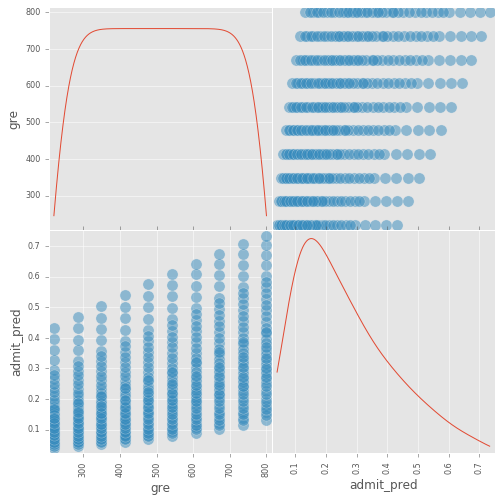

In [214]:
pd.tools.plotting.scatter_matrix(combos[ ['gre', 'admit_pred'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

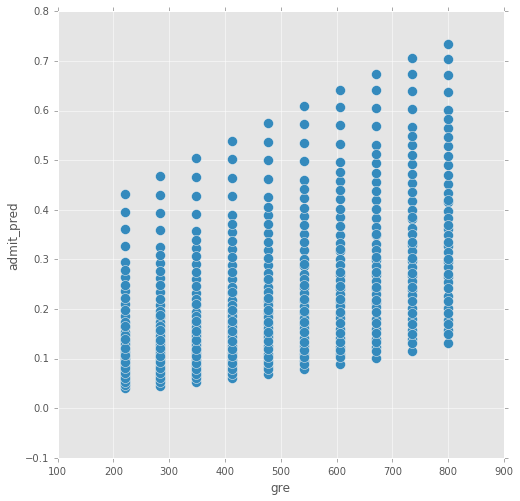

In [215]:
combos[ ['admit_pred', 'gre'] ].plot(kind = 'scatter', x = 'gre', y = 'admit_pred', s = 100, figsize = (8, 8))

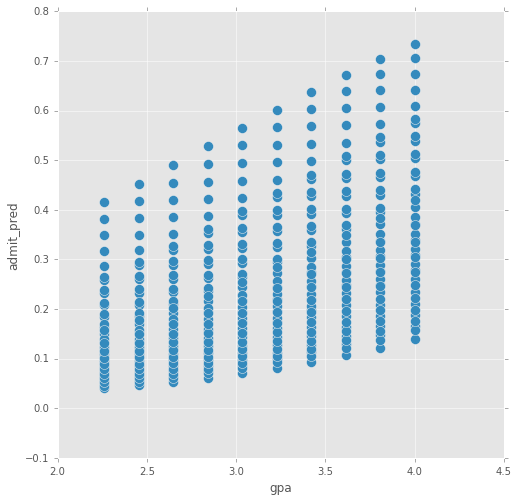

In [216]:
combos[ ['admit_pred', 'gpa'] ].plot(kind = 'scatter', x = 'gpa', y = 'admit_pred', s = 100, figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f087910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f40fd50>]], dtype=object)

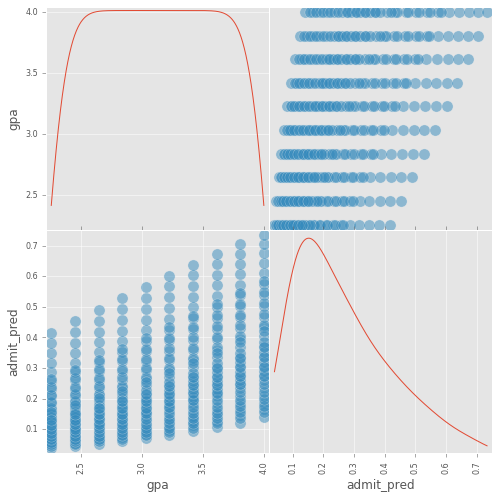

In [217]:
pd.tools.plotting.scatter_matrix(combos[ ['gpa', 'admit_pred'] ], diagonal = 'kde', s = 500, figsize = (8, 8))